In [1]:
import depoSimulator_symmetry
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import torch
import pyvista as pv
import pandas as pd
from scipy import interpolate
import CollisionModule

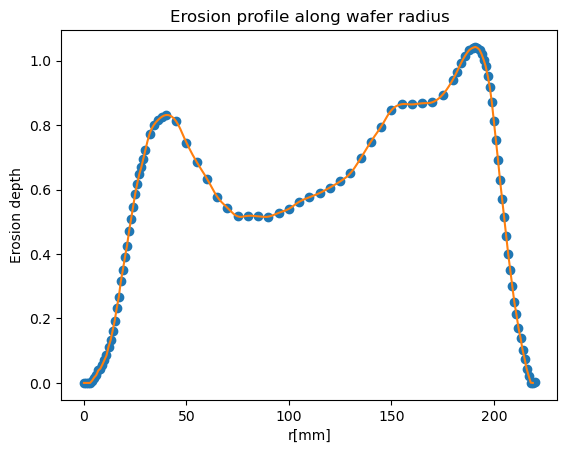

In [7]:
erosion = pd.read_excel('./erosionData.xlsx')

r = erosion['r'].to_numpy()
measure = erosion['measure'].to_numpy()
minus_m = measure < 0
measure[minus_m] = 0

erosion_func = interpolate.interp1d(r, measure, kind='quadratic')

xnew = np.arange(0, 220, 1)
ynew = erosion_func(xnew)   # use interpolation function returned by `interp1d`
plt.plot(r, measure, 'o', xnew, ynew, '-')
plt.title('Erosion profile along wafer radius')
plt.xlabel('r[mm]')
plt.ylabel('Erosion depth')
plt.show()

In [9]:
erosion_bins = 200
erosion_r = np.arange(0, 220, 220/erosion_bins)
erosion_r = erosion_r + 220/erosion_bins/2
# print(erosion_r)

erosion_event = erosion_func(erosion_r)
erosion_event_minus = erosion_event < 0
erosion_event[erosion_event_minus] = 0
for i in range(erosion_event.shape[0]):
    erosion_event[i] *= (220/erosion_bins)**2 + 2*i*(220/erosion_bins)**2
erosion_event *= 2e8

gen_dist_x = np.array([])
gen_dist_y = np.array([])

# r = np.linspace(0, 220, 22)
bins = 200
r = 220/bins

for i in range(bins):
    # print(i)
    # print(erosion_event[0][i])
    theta = np.random.rand(int(erosion_event[i]))*2*np.pi
    # print(theta.shape)
    # print(np.multiply((np.random.rand(int(erosion_event[0][i]))*0.01 + i*0.01), np.cos(theta)).shape)
    gen_dist_x = np.concatenate((gen_dist_x, np.multiply((np.random.rand(int(erosion_event[i]))*r + i*r), np.cos(theta))))
    # print(np.array(gen_dist_x).shape)
    gen_dist_y = np.concatenate((gen_dist_y, np.multiply((np.random.rand(int(erosion_event[i]))*r + i*r), np.sin(theta))))

print(gen_dist_x.shape)

xbins = np.linspace(-220,220,200)
ybins = np.linspace(-220,220,200)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(gen_dist_x, bins=xbins)
y_bins = np.histogram(gen_dist_y, bins=ybins)

H, xedges, yedges = np.histogram2d(gen_dist_x, gen_dist_y, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Position of released Al particles on target ')
ax.set_xlabel('x[m]')
ax.set_ylabel('y[m]')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

KeyboardInterrupt: 

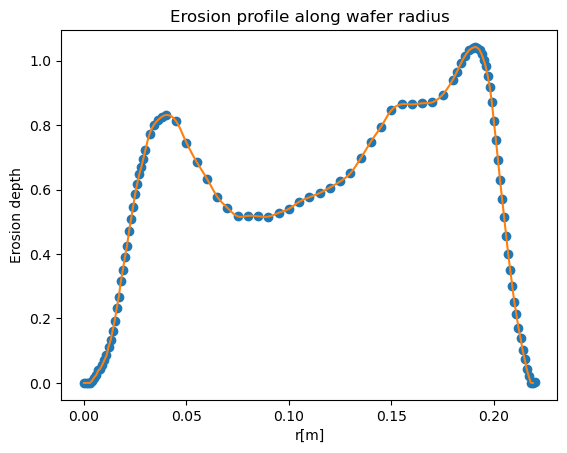

In [11]:
erosion = pd.read_excel('./erosionData.xlsx')

r = erosion['r'].to_numpy()/1000
measure = erosion['measure'].to_numpy()
minus_m = measure < 0
measure[minus_m] = 0

erosion_func = interpolate.interp1d(r, measure, kind='quadratic')

xnew = np.arange(0, 0.22, 0.001)
ynew = erosion_func(xnew)   # use interpolation function returned by `interp1d`
plt.plot(r, measure, 'o', xnew, ynew, '-')
plt.title('Erosion profile along wafer radius')
plt.xlabel('r[m]')
plt.ylabel('Erosion depth')
plt.show()

(6565275,)


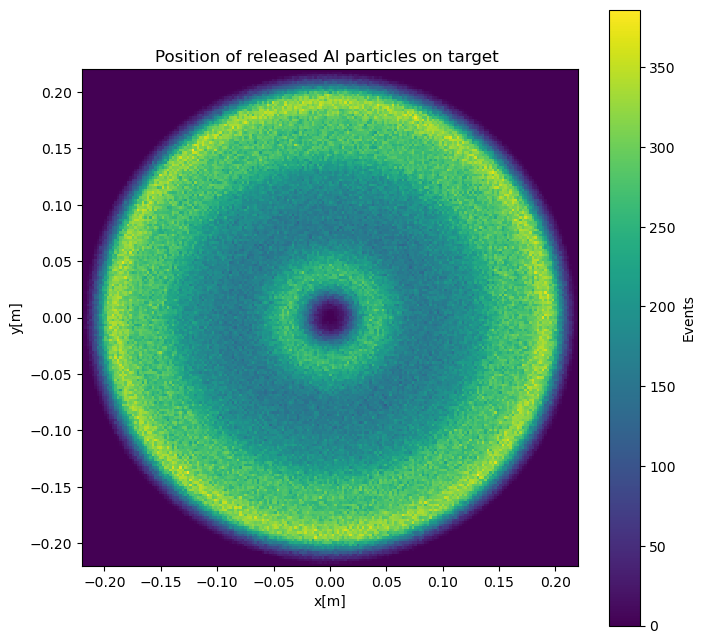

In [12]:
erosion_bins = 200
erosion_r = np.arange(0, 0.22, 0.22/erosion_bins)
erosion_r = erosion_r + 0.22/erosion_bins/2
# print(erosion_r)

erosion_event = erosion_func(erosion_r)
erosion_event_minus = erosion_event < 0
erosion_event[erosion_event_minus] = 0
for i in range(erosion_event.shape[0]):
    erosion_event[i] *= (0.22/erosion_bins)**2 + 2*i*(0.22/erosion_bins)**2
erosion_event *= 2e8

gen_dist_x = np.array([])
gen_dist_y = np.array([])

# r = np.linspace(0, 0.22, 22)
bins = 200
r = 0.22/bins

for i in range(bins):
    # print(i)
    # print(erosion_event[0][i])
    theta = np.random.rand(int(erosion_event[i]))*2*np.pi
    # print(theta.shape)
    # print(np.multiply((np.random.rand(int(erosion_event[0][i]))*0.01 + i*0.01), np.cos(theta)).shape)
    gen_dist_x = np.concatenate((gen_dist_x, np.multiply((np.random.rand(int(erosion_event[i]))*r + i*r), np.cos(theta))))
    # print(np.array(gen_dist_x).shape)
    gen_dist_y = np.concatenate((gen_dist_y, np.multiply((np.random.rand(int(erosion_event[i]))*r + i*r), np.sin(theta))))

print(gen_dist_x.shape)

xbins = np.linspace(-0.22,0.22,200)
ybins = np.linspace(-0.22,0.22,200)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(gen_dist_x, bins=xbins)
y_bins = np.histogram(gen_dist_y, bins=ybins)

H, xedges, yedges = np.histogram2d(gen_dist_x, gen_dist_y, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Position of released Al particles on target ')
ax.set_xlabel('x[m]')
ax.set_ylabel('y[m]')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [4]:
xbins = np.linspace(-0.22,0.22,80)
ybins = np.linspace(-0.22,0.22,80)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(gen_dist_x, bins=xbins)
y_bins = np.histogram(gen_dist_y, bins=ybins)

H, xedges, yedges = np.histogram2d(gen_dist_x, gen_dist_y, bins=(xbins, ybins))

xbins = np.linspace(-22,22,79)
ybins = np.linspace(-22,22,79)
x, y = np.meshgrid(xbins, ybins)

grid = pv.StructuredGrid(x, y, H/200)
grid.plot()

Widget(value='<iframe src="http://localhost:64882/index.html?ui=P_0x24baef2cdd0_0&reconnect=auto" class="pyvis…

In [5]:
def rfunc(x): #Release factor function
    # print("-------rfunc------")
    # print(x)
    n = 1.6
    beta = -0.7
    y = np.cos(x) ** n * (1 + beta * np.cos(x) ** 2)# * (n ** 2 + 4 * n + 3) / (n * beta + n + beta + 3) /2 / pi
    return y

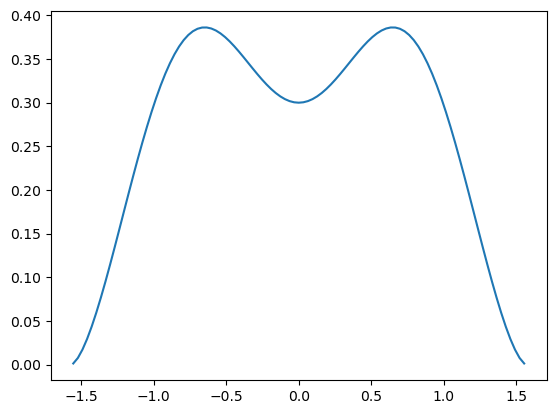

In [6]:
theta_bins_size = 100
theta_bins = np.linspace(-np.pi/2, np.pi/2, theta_bins_size)
theta_hist_x = theta_bins + np.pi/((theta_bins_size-1)*2)
theta_hist_x = theta_hist_x[:-1]

theta_hist_y = rfunc(theta_hist_x)

fig, ax = plt.subplots(1, 1)

ax.plot(theta_hist_x, theta_hist_y)

(array([  1304.,   7489.,  16875.,  28718.,  42556.,  58047.,  74933.,
         93126., 111606., 131467., 151137., 171060., 191540., 210694.,
        229879., 248684., 266991., 282958., 299365., 314100., 326798.,
        339213., 349739., 358122., 366576., 372373., 377086., 379780.,
        382163., 382273., 381422., 379198., 376468., 372720., 368257.,
        363182., 357383., 350921., 344536., 338678., 331719., 325808.,
        320461., 314318., 309938., 306114., 303126., 299335., 298436.,
        297010., 297784., 297738., 299308., 302766., 306004., 309784.,
        315460., 320026., 325784., 332326., 337898., 345216., 350326.,
        357431., 363080., 368100., 372996., 375911., 379792., 381489.,
        382613., 381787., 379993., 376721., 372449., 366250., 358589.,
        349557., 339169., 327607., 313369., 298853., 283916., 266301.,
        249053., 229831., 210927., 191063., 171211., 151180., 131425.,
        111881.,  92831.,  75200.,  57968.,  42445.,  28755.,  16884.,
      

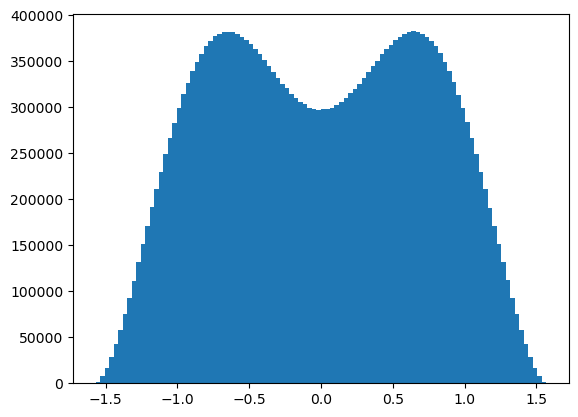

In [7]:
theta_sample = np.array([])
theta_hist_y *= 1e6
for i in range(theta_bins.shape[0] - 1):
    theta_sample = np.concatenate(( theta_sample, np.random.uniform(theta_bins[i], theta_bins[i+1], int(theta_hist_y[i]))))

plt.hist(theta_sample, bins=100)

(array([  313.,  1814.,  4174.,  7043., 10526., 14385., 18510., 22934.,
        27612., 32404., 37074., 42123., 47237., 51785., 56838., 61251.,
        65882., 69760., 73983., 77784., 80456., 83485., 86169., 88398.,
        90723., 91842., 92743., 94096., 94356., 94395., 94132., 93667.,
        92831., 92418., 91054., 89197., 87973., 86702., 84954., 83619.,
        81643., 80472., 79104., 77483., 76563., 75251., 74807., 74087.,
        73435., 72948., 73005., 73579., 73739., 74788., 75520., 76280.,
        78022., 78921., 80471., 81986., 83570., 85632., 86409., 88110.,
        89232., 91015., 92178., 92700., 93877., 94213., 94442., 94334.,
        93649., 92956., 92099., 90521., 88701., 86729., 83904., 80740.,
        77233., 73424., 69797., 65443., 61490., 56588., 51609., 46842.,
        42458., 37292., 32284., 27366., 22865., 18607., 14293., 10426.,
         7082.,  4217.,  1872.,   330.]),
 array([-1.57074170e+00, -1.53932655e+00, -1.50791140e+00, -1.47649625e+00,
        -1.4450811

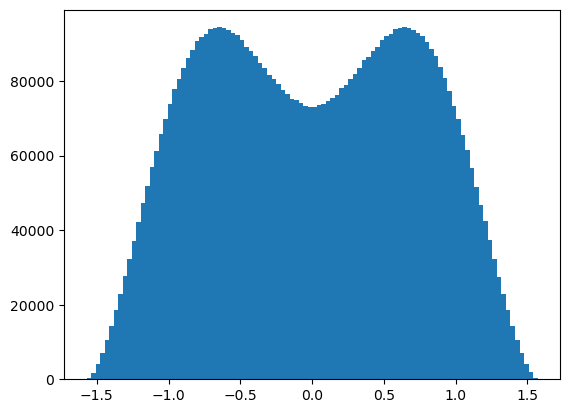

In [8]:
np.random.shuffle(theta_sample)
plt.hist(theta_sample[:int(gen_dist_x.shape[0])], bins=100)

In [9]:
def Energy_theta_func(C, enery, theta):
    U = 3.36 #binding
    m = 0.212
    Alpha = 0.14
    n = 0.5
    A = 13
    # m_t = 44.803928e-27
    # m_i = 66.335e-27
    m_t = 27
    m_i = 40
    q = 2 - m_t/(4*m_i)
    Q = 0.55
    E_inc = 437 # eVsb Vsb self bias
    return C * enery/(enery + U)**(3-2*m)*(1 - ((U + enery)/(U + Alpha*E_inc))**n)*np.exp(-A*((m_i/m_t)*((U + enery * np.cos(theta)**q)/E_inc))**Q)

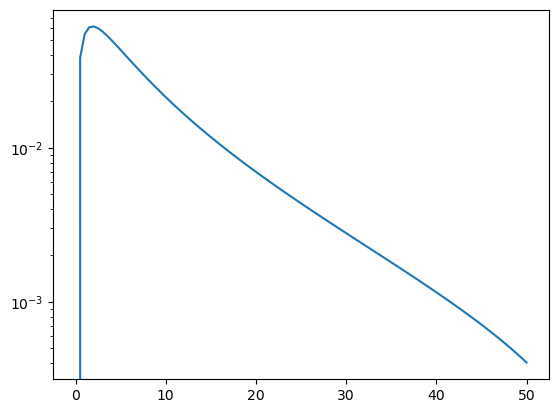

In [10]:
theta = 0.45*np.pi
enery = np.linspace(0, 50, 100)

fig, ax = plt.subplots(1,1)
ax.plot(enery, Energy_theta_func(10, enery, theta))
ax.set_yscale('log')

In [11]:
enery_bins = np.linspace(0, 50, 100)

energy_theta_tuple = []
for j in range(theta_hist_x.shape[0]):
    enery_sample = np.array([])
    for i in range(enery_bins.shape[0] - 1):
        enery_sample = np.concatenate(( enery_sample, np.random.uniform(enery_bins[i], enery_bins[i+1], int(Energy_theta_func(10, enery_bins[i], theta_hist_x[j]) *1e6))))
    energy_theta_tuple.append(enery_sample)

for i in range(len(energy_theta_tuple)):
    np.random.shuffle(energy_theta_tuple[i])

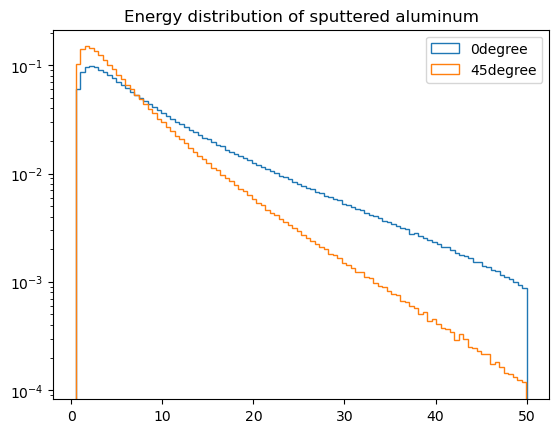

In [12]:
fig, ax = plt.subplots()
ax.set_title("Energy distribution of sputtered aluminum")
ax.hist(energy_theta_tuple[0],density=True, bins=100,histtype='step', stacked=True, fill=False, label='0degree')
ax.hist(energy_theta_tuple[25],density=True, bins=100,histtype='step', stacked=True, fill=False, label='45degree')
ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [13]:
test_sample = theta_sample[:int(gen_dist_x.shape[0])]
theta_hist_sample = np.histogram(test_sample, bins=99)

energy_sample = np.array([])
for i in range(99):
    energy_theta_sample = energy_theta_tuple[i][:theta_hist_sample[0][i] ]
    energy_sample = np.concatenate((energy_sample, energy_theta_sample))

print(energy_sample.shape)
print(gen_dist_x.shape[0])

(6565275,)
6565275


(array([2.70000e+01, 4.20000e+01, 4.90000e+01, 7.40000e+01, 9.90000e+01,
        1.32000e+02, 1.44000e+02, 1.94000e+02, 2.34000e+02, 2.74000e+02,
        2.73000e+02, 3.99000e+02, 4.15000e+02, 4.87000e+02, 5.47000e+02,
        6.12000e+02, 7.01000e+02, 7.71000e+02, 9.17000e+02, 1.03400e+03,
        1.17000e+03, 1.34900e+03, 1.47100e+03, 1.68500e+03, 1.88300e+03,
        2.14100e+03, 2.39300e+03, 2.59800e+03, 3.04100e+03, 3.35700e+03,
        3.66700e+03, 4.19400e+03, 4.71100e+03, 5.09500e+03, 5.77100e+03,
        6.37100e+03, 7.12900e+03, 7.78500e+03, 8.82500e+03, 9.53000e+03,
        1.07310e+04, 1.16370e+04, 1.28360e+04, 1.43530e+04, 1.60320e+04,
        1.76510e+04, 1.92950e+04, 2.12730e+04, 2.32090e+04, 2.55870e+04,
        2.84480e+04, 3.09010e+04, 3.42110e+04, 3.73550e+04, 4.11960e+04,
        4.53790e+04, 4.87070e+04, 5.38850e+04, 5.91320e+04, 6.43080e+04,
        7.03760e+04, 7.64240e+04, 8.28930e+04, 8.97950e+04, 9.76350e+04,
        1.05152e+05, 1.13360e+05, 1.22415e+05, 1.32

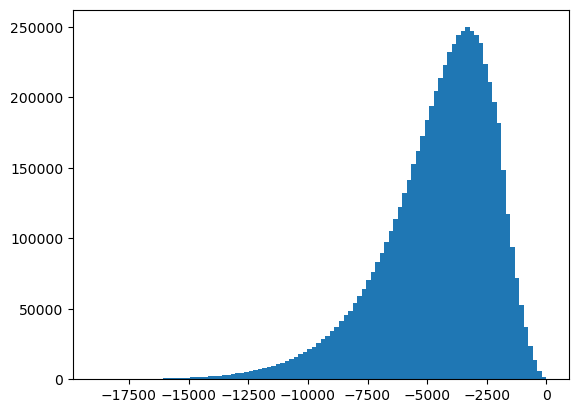

In [14]:
ev = 1.602176634e-19
velosity_norm_energy = np.sqrt((energy_sample*ev)*2/44.803928e-27)

test_sample_sort = np.sort(test_sample)

theta = test_sample_sort
phi = np.random.rand(gen_dist_x.shape[0])*2*np.pi
vel_x = np.cos(phi)*np.sin(theta)*velosity_norm_energy
vel_y = np.sin(phi)*np.sin(theta)*velosity_norm_energy
vel_z = np.cos(theta)*velosity_norm_energy

velosity_matrix = np.array([vel_x, vel_y, -vel_z]).T

rng = np.random.default_rng()
velosity_matrix = rng.permuted(velosity_matrix, axis=0)

plt.hist(velosity_matrix[:, 2], bins=100)

(array([1.30000e+01, 2.60000e+01, 4.90000e+01, 7.40000e+01, 1.04000e+02,
        1.43000e+02, 2.07000e+02, 2.68000e+02, 3.28000e+02, 4.79000e+02,
        5.71000e+02, 7.07000e+02, 8.14000e+02, 1.04400e+03, 1.27400e+03,
        1.60400e+03, 1.86900e+03, 2.19500e+03, 2.67800e+03, 3.05100e+03,
        3.73300e+03, 4.45600e+03, 5.28000e+03, 6.46600e+03, 7.42600e+03,
        8.72800e+03, 1.07020e+04, 1.25930e+04, 1.47560e+04, 1.79160e+04,
        2.10440e+04, 2.51010e+04, 3.00330e+04, 3.53530e+04, 4.21830e+04,
        4.98980e+04, 6.00700e+04, 7.10390e+04, 8.40950e+04, 1.00371e+05,
        1.18508e+05, 1.39519e+05, 1.63468e+05, 1.90710e+05, 2.22197e+05,
        2.55220e+05, 2.90924e+05, 3.33289e+05, 3.92301e+05, 5.58060e+05,
        5.45751e+05, 3.91356e+05, 3.31304e+05, 2.90027e+05, 2.54968e+05,
        2.21126e+05, 1.90589e+05, 1.63012e+05, 1.39505e+05, 1.18256e+05,
        9.99510e+04, 8.37010e+04, 7.02730e+04, 5.96840e+04, 5.01190e+04,
        4.20530e+04, 3.55590e+04, 2.95160e+04, 2.49

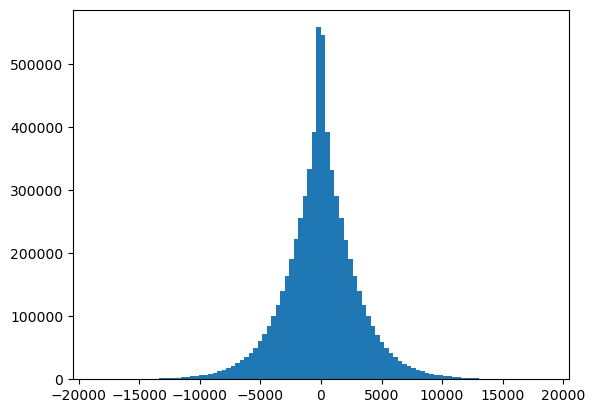

In [15]:
plt.hist(velosity_matrix[:, 1], bins=100)

In [16]:
from scipy.stats import rv_continuous
from scipy.stats.sampling import NumericalInversePolynomial
from scipy.special import gamma, factorial

In [17]:
def diVr_func(d_refi, eVr, wi):
    kb = 1.380649e-23
    Tref = 300
    ev = 1.60217663e-19
    diVr = d_refi * np.sqrt(((kb*Tref)/(eVr*ev))**(wi-1/2)*gamma(5/2 - wi))
    return diVr

In [18]:
def DXsec(d_refi, eVr, wi, chi):
    if chi == 0:
        return 0
    if chi != 0:
        return diVr_func(d_refi, eVr, wi)**2/(np.pi * np.sin(chi))*(1 - chi/np.pi)

C:\Users\URCS049\AppData\Local\Temp\ipykernel_31976\4036348.py:15: RuntimeWarning: [objid: PINV.003] 102 : center moved into domain of distribution => 
  rng50 = NumericalInversePolynomial(dist50, domain=[0.1, np.pi], random_state=urng)
C:\Users\URCS049\AppData\Local\Temp\ipykernel_31976\4036348.py:19: RuntimeWarning: [objid: PINV.004] 102 : center moved into domain of distribution => 
  rng100 = NumericalInversePolynomial(dist100, domain=[0.1, np.pi], random_state=urng)


[0.52164793 1.88458471 0.14061536 ... 1.37890356 0.11070467 0.45144283]


(array([847787., 663028., 542533., 458775., 395610., 348928., 311024.,
        278815., 253519., 232358., 213617., 197733., 183958., 172468.,
        161927., 151525., 142619., 135660., 129104., 122389., 116496.,
        111199., 106805., 102419.,  98314.,  94425.,  91451.,  87261.,
         84193.,  81706.,  78988.,  76636.,  73834.,  72234.,  69946.,
         67745.,  66170.,  64227.,  62465.,  60938.,  60011.,  58376.,
         57186.,  55788.,  54327.,  53287.,  52048.,  50885.,  50223.,
         49236.,  48040.,  47147.,  46522.,  45744.,  45499.,  44169.,
         44127.,  43331.,  42041.,  41941.,  41331.,  40121.,  40369.,
         40125.,  39353.,  38917.,  38518.,  37546.,  37798.,  37163.,
         36606.,  36735.,  35918.,  35537.,  35472.,  35752.,  35024.,
         34389.,  34764.,  34057.,  33833.,  33638.,  33567.,  33220.,
         32940.,  33302.,  32962.,  32869.,  32632.,  32682.,  32199.,
         32380.,  32446.,  32264.,  32293.,  32567.,  32354.,  31943.,
      

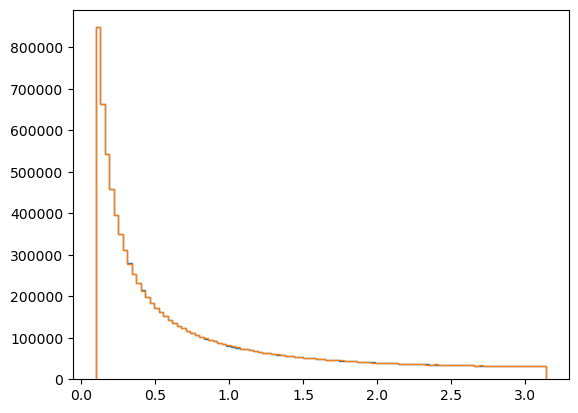

In [21]:
class DCS_gen_50(rv_continuous):
    "Dcs distribution"
    def _pdf(self, x):
       return DXsec((4.614 + 4.151)/2*1e-10, 0.01, 0.7205, x)
    

class DCS_gen_100(rv_continuous):
    "Dcs distribution"
    def _pdf(self, x):
       return DXsec((4.614 + 4.151)/2*1e-10, 50, 0.7205, x)
    
urng = np.random.default_rng()

dist50 =DCS_gen_50()
rng50 = NumericalInversePolynomial(dist50, domain=[0.1, np.pi], random_state=urng)
rvs50 = rng50.rvs(size=10000000)

dist100 =DCS_gen_100()
rng100 = NumericalInversePolynomial(dist100, domain=[0.1, np.pi], random_state=urng)
rvs100 = rng100.rvs(size=10000000)
print(rvs100)
plt.hist(rvs100, bins= 100, histtype='step', stacked=True, fill=False)
plt.hist(rvs50, bins= 100, histtype='step', stacked=True, fill=False)

In [22]:
print(rvs50.shape)

(10000000,)


In [29]:
transport = CollisionModule.transport(pressure_pa=0.1, timeStep= 1e-9, temperature=300, cellSize=[240, 240, 150], celllength=2, chamberSize=[0.24, 0.24], DXsec=rvs50)

In [20]:
release_pos = np.array([gen_dist_x, gen_dist_y, np.zeros_like(gen_dist_x)]).T

print(release_pos.shape)
print(velosity_matrix.shape)

(6565275, 3)
(6565275, 3)


In [23]:
np.save('release_pos_1e8',release_pos)
np.save('velosity_matrix_1e8', velosity_matrix)
np.save('DXsec_Al_1e8', rvs50)

In [33]:
transport.runE(p0=release_pos, v0=velosity_matrix, time=1e-7)

running:   0%|                                                            | 0.00/100 [00:00<?, ?B/s]


(array([], dtype=float64), array([[0, 0, 0]]))